<a href="https://colab.research.google.com/github/ayushi-get/breast-cancer-predictor/blob/main/Breast_cancer2_0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
data =load_breast_cancer()

In [ ]:
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
data['data'].shape

(569, 30)

In [ ]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
data['data'][0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [ ]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
j=0
for i in data['feature_names']:
  print(i,":",data['data'][0][j])
  j+=1


mean radius : 17.99
mean texture : 10.38
mean perimeter : 122.8
mean area : 1001.0
mean smoothness : 0.1184
mean compactness : 0.2776
mean concavity : 0.3001
mean concave points : 0.1471
mean symmetry : 0.2419
mean fractal dimension : 0.07871
radius error : 1.095
texture error : 0.9053
perimeter error : 8.589
area error : 153.4
smoothness error : 0.006399
compactness error : 0.04904
concavity error : 0.05373
concave points error : 0.01587
symmetry error : 0.03003
fractal dimension error : 0.006193
worst radius : 25.38
worst texture : 17.33
worst perimeter : 184.6
worst area : 2019.0
worst smoothness : 0.1622
worst compactness : 0.6656
worst concavity : 0.7119
worst concave points : 0.2654
worst symmetry : 0.4601
worst fractal dimension : 0.1189


In [ ]:
feature = data['data']

label = data['target']

data['target_names']

feature.shape

label.shape

scale = StandardScaler()

feature = scale.fit_transform(feature)

j = 0
for i in data['feature_names']:
  print(i,":",feature[0][j])
  j+=1

print(feature[568])


mean radius : 1.0970639814699807
mean texture : -2.0733350146975935
mean perimeter : 1.2699336881399383
mean area : 0.9843749048031144
mean smoothness : 1.568466329243428
mean compactness : 3.2835146709868264
mean concavity : 2.652873983743168
mean concave points : 2.532475216403245
mean symmetry : 2.2175150059646405
mean fractal dimension : 2.255746885296269
radius error : 2.4897339267376193
texture error : -0.5652650590684639
perimeter error : 2.833030865855184
area error : 2.4875775569611043
smoothness error : -0.21400164666895383
compactness error : 1.3168615683959484
concavity error : 0.72402615808036
concave points error : 0.6608199414286064
symmetry error : 1.1487566671861758
fractal dimension error : 0.9070830809973359
worst radius : 1.8866896251792757
worst texture : -1.3592934737640827
worst perimeter : 2.3036006236225606
worst area : 2.0012374893299207
worst smoothness : 1.3076862710715387
worst compactness : 2.616665023512603
worst concavity : 2.1095263465722556
worst conca

In [ ]:
print(data['target_names'][label[568]],label[568])

df_frt = pd.DataFrame(feature , columns = data['feature_names'])
df_lbl = pd.DataFrame(label , columns = ['label'])
df = pd.concat([df_frt, df_lbl], axis=1)
df = df.sample(frac = 1)

feature = df.values[ : , : 30]
label = df.values[ : ,30: ]

df


benign 1


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
21,-1.313080,-1.593959,-1.302806,-1.083572,0.429819,-0.747086,-0.743748,-0.726337,0.012345,0.886341,-0.461517,-0.435539,-0.473774,-0.542058,0.855042,-0.623623,-0.399334,0.391552,-0.032970,-0.312777,-1.250611,-1.631243,-1.254913,-0.994422,0.001377,-0.887193,-0.880434,-0.796903,-0.729224,-0.344455,1
218,1.611130,0.528326,1.554146,1.635674,-0.180069,0.497647,0.482119,0.979935,1.030958,-0.990566,1.985527,-0.055979,1.792477,1.849528,-0.078996,0.347178,0.085090,0.863582,-0.190372,0.094599,1.959169,0.482470,1.877663,1.983658,0.128501,0.440431,0.429434,1.026178,0.273800,-0.077350,0
116,-1.470424,-0.821373,-1.368711,-1.165198,-0.123848,0.378253,0.048094,-0.666494,-1.849636,1.252083,-0.331946,-0.431729,0.204913,-0.514776,3.769827,2.354171,2.013834,1.830352,0.399281,0.683158,-1.419590,-1.401633,-1.308230,-1.073352,-0.634244,-0.422174,-0.565093,-1.159448,-2.020213,-0.372717,1
250,1.934906,0.993739,1.933096,2.016784,0.308838,1.066192,2.290035,2.117192,1.436213,-0.541186,2.161296,-0.718577,1.735548,2.146551,-0.586017,0.760202,2.098385,1.110141,0.419864,0.456586,1.928106,0.215406,1.728734,1.985416,-0.493969,0.400354,2.048118,1.460136,0.364396,-0.302339,0
430,0.219460,0.754052,0.417297,0.085638,0.221305,2.239288,2.316401,1.243034,0.837458,0.876418,-0.549221,-0.620421,0.296989,-0.355263,-0.025327,2.048456,1.570525,1.710316,-0.672264,0.752378,0.016734,0.308227,0.540279,-0.084174,0.417818,2.892750,3.021056,2.023520,-0.056227,1.748601,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,0.537556,0.919273,0.442011,0.406453,-1.017686,-0.713542,-0.700684,-0.404686,-1.035476,-0.826124,-0.092656,-0.054164,-0.198042,0.003805,-1.004034,-0.905921,-0.692442,-0.682114,-0.719485,-0.284787,0.604849,1.335771,0.492622,0.473611,-0.625477,-0.630828,-0.605872,-0.226210,0.076431,0.031819,0
190,0.026330,0.891349,0.098896,-0.127954,0.792763,2.595576,1.372267,0.445226,2.089732,1.789355,-0.430117,1.620475,-0.373282,-0.189590,0.309686,6.143482,2.808608,0.788966,3.703513,2.997678,-0.109586,1.873156,-0.025652,-0.207756,0.917547,4.315794,2.766307,0.953090,3.664668,3.361201,0
487,1.508885,-0.109290,1.488242,1.456496,0.892395,0.766758,1.717529,1.817982,0.041553,-0.233566,0.580101,0.346806,0.378669,0.602911,-0.584350,0.159389,0.353662,-0.005862,-0.408313,-0.220862,1.592632,0.767446,1.389175,1.510780,0.834259,0.752140,1.541979,1.391616,0.590885,0.340485,0
417,0.389869,0.416627,0.450249,0.421527,1.113008,0.999861,0.795994,0.925768,0.998100,0.828220,3.482267,-0.006991,3.246381,2.995817,0.385689,0.749583,0.432244,1.556217,-0.043867,0.764104,1.429037,0.321254,1.484490,1.524843,0.847409,0.928350,0.714407,1.504293,0.165409,1.155652,0


In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
21,-1.313080,-1.593959,-1.302806,-1.083572,0.429819,-0.747086,-0.743748,-0.726337,0.012345,0.886341,-0.461517,-0.435539,-0.473774,-0.542058,0.855042,-0.623623,-0.399334,0.391552,-0.032970,-0.312777,-1.250611,-1.631243,-1.254913,-0.994422,0.001377,-0.887193,-0.880434,-0.796903,-0.729224,-0.344455,1
218,1.611130,0.528326,1.554146,1.635674,-0.180069,0.497647,0.482119,0.979935,1.030958,-0.990566,1.985527,-0.055979,1.792477,1.849528,-0.078996,0.347178,0.085090,0.863582,-0.190372,0.094599,1.959169,0.482470,1.877663,1.983658,0.128501,0.440431,0.429434,1.026178,0.273800,-0.077350,0
116,-1.470424,-0.821373,-1.368711,-1.165198,-0.123848,0.378253,0.048094,-0.666494,-1.849636,1.252083,-0.331946,-0.431729,0.204913,-0.514776,3.769827,2.354171,2.013834,1.830352,0.399281,0.683158,-1.419590,-1.401633,-1.308230,-1.073352,-0.634244,-0.422174,-0.565093,-1.159448,-2.020213,-0.372717,1
250,1.934906,0.993739,1.933096,2.016784,0.308838,1.066192,2.290035,2.117192,1.436213,-0.541186,2.161296,-0.718577,1.735548,2.146551,-0.586017,0.760202,2.098385,1.110141,0.419864,0.456586,1.928106,0.215406,1.728734,1.985416,-0.493969,0.400354,2.048118,1.460136,0.364396,-0.302339,0
430,0.219460,0.754052,0.417297,0.085638,0.221305,2.239288,2.316401,1.243034,0.837458,0.876418,-0.549221,-0.620421,0.296989,-0.355263,-0.025327,2.048456,1.570525,1.710316,-0.672264,0.752378,0.016734,0.308227,0.540279,-0.084174,0.417818,2.892750,3.021056,2.023520,-0.056227,1.748601,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,0.537556,0.919273,0.442011,0.406453,-1.017686,-0.713542,-0.700684,-0.404686,-1.035476,-0.826124,-0.092656,-0.054164,-0.198042,0.003805,-1.004034,-0.905921,-0.692442,-0.682114,-0.719485,-0.284787,0.604849,1.335771,0.492622,0.473611,-0.625477,-0.630828,-0.605872,-0.226210,0.076431,0.031819,0
190,0.026330,0.891349,0.098896,-0.127954,0.792763,2.595576,1.372267,0.445226,2.089732,1.789355,-0.430117,1.620475,-0.373282,-0.189590,0.309686,6.143482,2.808608,0.788966,3.703513,2.997678,-0.109586,1.873156,-0.025652,-0.207756,0.917547,4.315794,2.766307,0.953090,3.664668,3.361201,0
487,1.508885,-0.109290,1.488242,1.456496,0.892395,0.766758,1.717529,1.817982,0.041553,-0.233566,0.580101,0.346806,0.378669,0.602911,-0.584350,0.159389,0.353662,-0.005862,-0.408313,-0.220862,1.592632,0.767446,1.389175,1.510780,0.834259,0.752140,1.541979,1.391616,0.590885,0.340485,0
417,0.389869,0.416627,0.450249,0.421527,1.113008,0.999861,0.795994,0.925768,0.998100,0.828220,3.482267,-0.006991,3.246381,2.995817,0.385689,0.749583,0.432244,1.556217,-0.043867,0.764104,1.429037,0.321254,1.484490,1.524843,0.847409,0.928350,0.714407,1.504293,0.165409,1.155652,0


In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,-3.147648e-15,-6.575096e-15,-7.383276e-16,-9.037879e-16,6.094520e-15,-1.114125e-15,-3.110185e-16,1.022030e-15,-1.836331e-15,-1.495045e-15,-9.841766e-16,-9.092512e-16,1.896355e-15,-7.401812e-16,-7.264254e-16,-3.811636e-16,8.072409e-16,-3.047908e-16,-3.024333e-16,-3.076528e-16,-2.296152e-15,1.744357e-15,-1.191782e-15,6.157933e-16,-5.041076e-15,-2.114789e-15,6.228176e-16,-2.056547e-16,-2.437613e-15,2.527562e-15,0.627417
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,0.483918
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,-1.059924e+00,-1.554264e+00,-1.044049e+00,-7.378291e-01,-1.776065e+00,-1.298098e+00,-1.057501e+00,-1.913447e+00,-1.532890e+00,-1.096968e+00,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00,0.000000
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,-6.235706e-01,-6.948092e-01,-6.237679e-01,-4.947542e-01,-6.240183e-01,-6.929263e-01,-5.571612e-01,-6.744900e-01,-6.516807e-01,-5.851185e-01,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01,0.000000
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,-2.922452e-01,-1.974976e-01,-2.866520e-01,-3.477828e-01,-2.203352e-01,-2.810204e-01,-1.990654e-01,-1.404958e-01,-2.194304e-01,-2.299405e-01,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01,1.000000
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,2.660996e-01,4.665523e-01,2.430307e-01,1.067726e-01,3.683553e-01,3.896541e-01,3.367521e-01,4.726567e-01,3.556925e-01,2.886421e-01,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01,1.000000
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,8.906909e+00,6.655279e+00,9.461986e+00,1.104184e+01,8.029999e+00,6.143482e+00,1.207268e+01,6.649601e+00,7.071917e+00,9.851593e+00,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 21 to 517
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         

In [ ]:
X_train = feature[:500]
y_train = label[:500]


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
mean_radius =df.values[:,0]
label=df.values[:,-1]

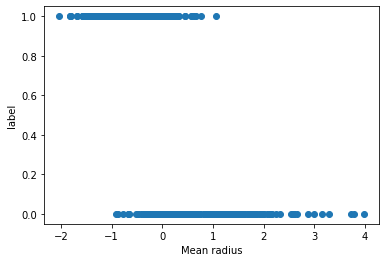

In [ ]:
plt.xlabel("Mean radius")
plt.ylabel("label")
plt.plot(mean_radius , label,'o')
plt.show()

In [ ]:
mean_texture =df.values[:,1]
label=df.values[:,-1]

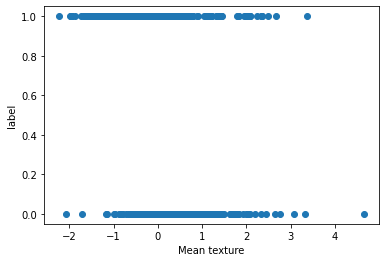

In [ ]:
plt.xlabel("Mean texture")
plt.ylabel("label")
plt.plot(mean_texture, label,'o')
plt.show()

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
21,-1.313080,-1.593959,-1.302806,-1.083572,0.429819,-0.747086,-0.743748,-0.726337,0.012345,0.886341,-0.461517,-0.435539,-0.473774,-0.542058,0.855042,-0.623623,-0.399334,0.391552,-0.032970,-0.312777,-1.250611,-1.631243,-1.254913,-0.994422,0.001377,-0.887193,-0.880434,-0.796903,-0.729224,-0.344455,1
218,1.611130,0.528326,1.554146,1.635674,-0.180069,0.497647,0.482119,0.979935,1.030958,-0.990566,1.985527,-0.055979,1.792477,1.849528,-0.078996,0.347178,0.085090,0.863582,-0.190372,0.094599,1.959169,0.482470,1.877663,1.983658,0.128501,0.440431,0.429434,1.026178,0.273800,-0.077350,0
116,-1.470424,-0.821373,-1.368711,-1.165198,-0.123848,0.378253,0.048094,-0.666494,-1.849636,1.252083,-0.331946,-0.431729,0.204913,-0.514776,3.769827,2.354171,2.013834,1.830352,0.399281,0.683158,-1.419590,-1.401633,-1.308230,-1.073352,-0.634244,-0.422174,-0.565093,-1.159448,-2.020213,-0.372717,1
250,1.934906,0.993739,1.933096,2.016784,0.308838,1.066192,2.290035,2.117192,1.436213,-0.541186,2.161296,-0.718577,1.735548,2.146551,-0.586017,0.760202,2.098385,1.110141,0.419864,0.456586,1.928106,0.215406,1.728734,1.985416,-0.493969,0.400354,2.048118,1.460136,0.364396,-0.302339,0
430,0.219460,0.754052,0.417297,0.085638,0.221305,2.239288,2.316401,1.243034,0.837458,0.876418,-0.549221,-0.620421,0.296989,-0.355263,-0.025327,2.048456,1.570525,1.710316,-0.672264,0.752378,0.016734,0.308227,0.540279,-0.084174,0.417818,2.892750,3.021056,2.023520,-0.056227,1.748601,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,0.537556,0.919273,0.442011,0.406453,-1.017686,-0.713542,-0.700684,-0.404686,-1.035476,-0.826124,-0.092656,-0.054164,-0.198042,0.003805,-1.004034,-0.905921,-0.692442,-0.682114,-0.719485,-0.284787,0.604849,1.335771,0.492622,0.473611,-0.625477,-0.630828,-0.605872,-0.226210,0.076431,0.031819,0
190,0.026330,0.891349,0.098896,-0.127954,0.792763,2.595576,1.372267,0.445226,2.089732,1.789355,-0.430117,1.620475,-0.373282,-0.189590,0.309686,6.143482,2.808608,0.788966,3.703513,2.997678,-0.109586,1.873156,-0.025652,-0.207756,0.917547,4.315794,2.766307,0.953090,3.664668,3.361201,0
487,1.508885,-0.109290,1.488242,1.456496,0.892395,0.766758,1.717529,1.817982,0.041553,-0.233566,0.580101,0.346806,0.378669,0.602911,-0.584350,0.159389,0.353662,-0.005862,-0.408313,-0.220862,1.592632,0.767446,1.389175,1.510780,0.834259,0.752140,1.541979,1.391616,0.590885,0.340485,0
417,0.389869,0.416627,0.450249,0.421527,1.113008,0.999861,0.795994,0.925768,0.998100,0.828220,3.482267,-0.006991,3.246381,2.995817,0.385689,0.749583,0.432244,1.556217,-0.043867,0.764104,1.429037,0.321254,1.484490,1.524843,0.847409,0.928350,0.714407,1.504293,0.165409,1.155652,0


In [ ]:
X_train

array([[-1.31308049, -1.59395919, -1.30280622, ..., -0.7969026 ,
        -0.72922385, -0.34445459],
       [ 1.61112968,  0.52832603,  1.55414607, ...,  1.02617791,
         0.27380013, -0.07735035],
       [-1.47042435, -0.8213729 , -1.36871054, ..., -1.15944788,
        -2.02021278, -0.37271666],
       ...,
       [-0.51897679, -0.78879396, -0.54119942, ..., -1.01190215,
        -0.67745487, -1.15740463],
       [-0.4110514 ,  1.05889734, -0.38220524, ...,  0.86782129,
         0.78016546,  1.0614447 ],
       [-0.54453807, -0.29545573, -0.56261832, ..., -0.40070654,
         0.51323166, -0.51236452]])

In [ ]:
X_val = feature[500:535]
y_val = label[500:535]

#34 Testing
X_test = feature[535:]
y_test = label[535:]


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

Lr=LogisticRegression(random_state=0)
Lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [ ]:
predict=Lr.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(predict,y_val))

0.9714285714285714


In [ ]:
predict=Lr.predict(X_test)


In [ ]:
print(accuracy_score(predict,y_test))

0.9705882352941176


In [ ]:
# svm
from sklearn import svm
regressor = svm.SVC()
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
predict=regressor.predict(X_val)


In [ ]:
predict

array([1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1.])

In [ ]:
print(accuracy_score(predict,y_val))

0.9428571428571428


In [ ]:
predict

array([1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1.])

In [ ]:
predict=regressor.predict(X_test)

In [ ]:
print(accuracy_score(predict,y_test))

0.9705882352941176


In [ ]:
# decision tree classifer
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  

In [ ]:
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
predict=classifier.predict(X_val)


In [ ]:
print(accuracy_score(predict,y_val))

0.9142857142857143


In [ ]:
predict=classifier.predict(X_test)

In [ ]:
print(accuracy_score(predict,y_test))

0.9705882352941176


In [ ]:
# Random forest classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy") 

In [ ]:
classifier.fit(X_train, y_train)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
predict=classifier.predict(X_val)

In [ ]:
print(accuracy_score(predict,y_val))

0.9428571428571428


In [ ]:
predict=classifier.predict(X_test)

In [ ]:
print(accuracy_score(predict,y_test))

0.9411764705882353


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
predict=neigh.predict(X_val)

In [ ]:
print(accuracy_score(predict,y_val))

0.9428571428571428


In [ ]:
predict=neigh.predict(X_test)

In [ ]:
print(accuracy_score(predict,y_test))

0.9411764705882353


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
 gnb = GaussianNB()

In [ ]:
gnb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
predict= gnb.predict(X_val)

In [ ]:
print(accuracy_score(predict,y_val))

0.9142857142857143


In [ ]:
predict= gnb.predict(X_test)

In [ ]:
print(accuracy_score(predict,y_test))

0.9117647058823529


In [ ]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = 30))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile( loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

model.fit( X_train , y_train, epochs = 20, batch_size = 10, validation_data = (X_val, y_val))



Epoch 1/20
50/50 [==============================] - 1s 5ms/step - loss: 0.4698 - accuracy: 0.8020 - val_loss: 0.2986 - val_accuracy: 0.9143
Epoch 2/20
50/50 [==============================] - 0s 3ms/step - loss: 0.1947 - accuracy: 0.9580 - val_loss: 0.1853 - val_accuracy: 0.9143
Epoch 3/20
50/50 [==============================] - 0s 2ms/step - loss: 0.1092 - accuracy: 0.9680 - val_loss: 0.1596 - val_accuracy: 0.9143
Epoch 4/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0777 - accuracy: 0.9740 - val_loss: 0.1511 - val_accuracy: 0.9143
Epoch 5/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0630 - accuracy: 0.9800 - val_loss: 0.1522 - val_accuracy: 0.9143
Epoch 6/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9840 - val_loss: 0.1493 - val_accuracy: 0.9143
Epoch 7/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9820 - val_loss: 0.1528 - val_accuracy: 0.9143
Epoch 8/20
50/50 [==

In [ ]:
model.evaluate(X_test , y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.3597 - accuracy: 0.9412


[0.3597273826599121, 0.9411764740943909]

In [ ]:
model.evaluate(X_val , y_val)

2/2 [==============================] - 0s 5ms/step - loss: 0.2184 - accuracy: 0.9429


[0.21837593615055084, 0.9428571462631226]

In [ ]:
for i in range(30):
  sample = X_test[i]
  sample = np.reshape(sample, (1,30))

  if (model.predict(sample)[0][0] > 0.5):
    print("-Benign")
  else:
    print("-Malignant")
  if (y_test[i] == 1):
    print("*Banign")
  else:
    print("*Melignant")
  print("-----------")


-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Malignant
*Melignant
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Malignant
*Melignant
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Malignant
*Melignant
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Malignant
*Melignant
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Malignant
*Melignant
-----------
-Benign
*Melignant
-----------
-Benign
*Banign
-----------
-Benign
*Banign
-----------
-Malignant
*Melignant
-----------
-Malignant
*Melignant
-----------
